# Traitement des données d'un questionnaire

Ce notebook propose de suivre les différentes étapes de l'analyse des données d'une enquête par questionnaire.

**L'enquête est passée par un prestataire, et les résultats sont transmis dans un fichier SPSS .sav**

### Démarche

Les étapes du traitement sont alors :

1. Chargement et recodage
2. Nettoyage et exploration (1. et 2. sont itératifs)
3. Production de statistiques descriptives et de visualisations
4. Traitements statistiques plus avancées autour de certaines questions
5. Production de visualisations finalisées

Le Notebook permet de noter progressivement les idées de l'analyse.

**Pour les besoins pédagogique, la première partie de chargement suit un peu la démarche "progressive", avec un exemple de recodage, puis nous passerons rapidement sur le recodage de chaque variable.**

### Données

Le jeu de données sera celui du Wellcome Trust passé par Gallup à travers le monde pour connaître l'attitude vis-à-vis de la science. Une question générale est alors : retrouve-t-on les mêmes tendances dans tous les pays ?

Les données ainsi que le rapport sont disponibles ici : https://wellcome.org/reports/wellcome-global-monitor-covid-19/2020





## Etape 0. Les bibliothèques

Pour utiliser la puissance de Python, on a besoin de recourir à des outils déjà développés (en Python) regroupés dans des bibliothèques, permettant de manipuler des tableaux, faire des visualisations, etc.

Ces bibliothèques sont regroupées sur https://pypi.org/

Pour les installer, il suffit d'utiliser la commande **pip install NOMDELABIBLIOTHEQUE** soit dans la console, soit dans une cellule.

Chaque bibliothèque a sa philosophie : jeter un coup d'oeil à la documentation est souvent nécessaire.

$\rightarrow$ Installer les bibliothèques : pandas, pyshs, matplotlib

> pip install pandas pyshs matplotlib

Et potentiellement `geopandas` pour les cartes

In [59]:
pip install pandas pyshs matplotlib

Note: you may need to restart the kernel to use updated packages.


## Etape 1. Chargement et recodage

Utilisation de la puissance de Pandas : https://pandas.pydata.org/

In [60]:
# Chargement de bibliothèques
import pandas as pd
import pyshs
import matplotlib.pyplot as plt

In [62]:
pd.read_spss

<function pandas.io.spss.read_spss(path: 'str | Path', usecols: 'Sequence[str] | None' = None, convert_categoricals: 'bool' = True) -> 'DataFrame'>

In [63]:
data = pd.read_spss("./wgm-full-wave2-public-file.sav", convert_categoricals=True)

In [65]:
data.shape

(119088, 89)

In [125]:
# Ou d'utiliser Pyreadstat pour séparer les méta-données
import pyreadstat
data_pur, meta = pyreadstat.read_sav('./wgm-full-wave2-public-file.sav')

In [129]:
meta.variable_value_labels

{'W1': {1.0: 'A lot',
  2.0: 'Some',
  3.0: 'Not much',
  4.0: 'Nothing at all',
  99.0: 'DK/Refused'},
 'W2': {1.0: 'All of it',
  2.0: 'Some of it',
  3.0: 'Not much of it',
  4.0: 'None of it',
  98.0: '',
  99.0: 'DK/Refused'},
 'W3': {0.0: 'None',
  1.0: 'Primary',
  2.0: 'Secondary and post-secondary',
  3.0: 'University'},
 'W4': {1.0: 'A lot',
  2.0: 'Some',
  3.0: 'Not much',
  4.0: 'None at all',
  99.0: 'DK/Refused'},
 'W5A': {1.0: 'A lot',
  2.0: 'Some',
  3.0: 'Not much',
  4.0: 'Not at all',
  99.0: 'DK/Refused'},
 'W5B': {1.0: 'A lot',
  2.0: 'Some',
  3.0: 'Not much',
  4.0: 'Not at all',
  99.0: 'DK/Refused'},
 'W5C': {1.0: 'A lot',
  2.0: 'Some',
  3.0: 'Not much',
  4.0: 'Not at all',
  99.0: 'DK/Refused'},
 'W5D': {1.0: 'A lot',
  2.0: 'Some',
  3.0: 'Not much',
  4.0: 'Not at all',
  99.0: 'DK/Refused'},
 'W5E': {1.0: 'A lot',
  2.0: 'Some',
  3.0: 'Not much',
  4.0: 'Not at all',
  99.0: 'DK/Refused'},
 'W5F': {1.0: 'A lot',
  2.0: 'Some',
  3.0: 'Not much',
  4.0

In [66]:
data.head()

,COUNTRYNEW,WPID_RANDOM,WGT,PROJWT,FIELD_DATE,YEAR_WAVE,W1,W2,W3,W4,...,age_var1,age_var2,age_var3,Gender,Education,Household_Income,Global11Regions,wbi,Subjective_Income,EMP_2010
0,United States,178216898.0,0.803440,211560.296964,1.382089e+10,2020.0,Some,All of it,Secondary and post-secondary,Some,...,50+,65+,50+,Female,Secondary (8-15 years),Richest 20%,Northern America,High income,Getting by on present income,Out of workforce
1,United States,159107018.0,0.729590,192114.267405,1.382089e+10,2020.0,A lot,All of it,University,A lot,...,15-29,15-29,15-24,Male,Tertiary (16+ years),Fourth 20%,Northern America,High income,Living comfortably on present income,Employed full time for an employer
2,United States,203166417.0,0.848559,223440.987140,1.382089e+10,2020.0,A lot,All of it,University,A lot,...,15-29,15-29,25-34,Male,Tertiary (16+ years),Fourth 20%,Northern America,High income,Living comfortably on present income,Employed full time for an employer
3,United States,201061719.0,0.341083,89813.417721,1.382089e+10,2020.0,Some,All of it,University,Some,...,50+,50-64,50+,Female,Tertiary (16+ years),Fourth 20%,Northern America,High income,Getting by on present income,Employed full time for an employer
4,United States,195404162.0,0.995933,262247.166290,1.382089e+10,2020.0,Not much,All of it,Secondary and post-secondary,A lot,...,30-49,30-49,35-49,Male,Secondary (8-15 years),Second 20%,Northern America,High income,Finding it very difficult on present income,Out of workforce


C'est un **tableau Pandas** (DataFrame). Il est possible :

- de sélectionner des éléments, de les filtrers
- de faire des opérations similaires à des requêtes
- de faire des traitements plus complexes...

In [72]:
data[data["COUNTRYNEW"]=="United States"]

,COUNTRYNEW,WPID_RANDOM,WGT,PROJWT,FIELD_DATE,YEAR_WAVE,W1,W2,W3,W4,...,age_var1,age_var2,age_var3,Gender,Education,Household_Income,Global11Regions,wbi,Subjective_Income,EMP_2010
0,United States,178216898.0,0.803440,211560.296964,1.382089e+10,2020.0,Some,All of it,Secondary and post-secondary,Some,...,50+,65+,50+,Female,Secondary (8-15 years),Richest 20%,Northern America,High income,Getting by on present income,Out of workforce
1,United States,159107018.0,0.729590,192114.267405,1.382089e+10,2020.0,A lot,All of it,University,A lot,...,15-29,15-29,15-24,Male,Tertiary (16+ years),Fourth 20%,Northern America,High income,Living comfortably on present income,Employed full time for an employer
2,United States,203166417.0,0.848559,223440.987140,1.382089e+10,2020.0,A lot,All of it,University,A lot,...,15-29,15-29,25-34,Male,Tertiary (16+ years),Fourth 20%,Northern America,High income,Living comfortably on present income,Employed full time for an employer
3,United States,201061719.0,0.341083,89813.417721,1.382089e+10,2020.0,Some,All of it,University,Some,...,50+,50-64,50+,Female,Tertiary (16+ years),Fourth 20%,Northern America,High income,Getting by on present income,Employed full time for an employer
4,United States,195404162.0,0.995933,262247.166290,1.382089e+10,2020.0,Not much,All of it,Secondary and post-secondary,A lot,...,30-49,30-49,35-49,Male,Secondary (8-15 years),Second 20%,Northern America,High income,Finding it very difficult on present income,Out of workforce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,United States,115167542.0,1.496869,394152.867828,1.382089e+10,2020.0,Nothing at all,Some of it,Primary,Some,...,50+,65+,50+,Female,Elementary or less (8 years or less),Poorest 20%,Northern America,High income,Living comfortably on present income,Out of workforce
997,United States,113342656.0,2.700858,711184.931546,1.382089e+10,2020.0,A lot,All of it,Secondary and post-secondary,A lot,...,15-29,15-29,15-24,Female,Secondary (8-15 years),Middle 20%,Northern America,High income,Living comfortably on present income,Out of workforce
998,United States,128148381.0,0.355765,93679.438681,1.382089e+10,2020.0,A lot,All of it,University,Not much,...,50+,50-64,50+,Male,Tertiary (16+ years),Poorest 20%,Northern America,High income,Finding it difficult on present income,Employed full time for self
999,United States,191221991.0,0.668067,175914.115524,1.382089e+10,2020.0,Some,All of it,University,A lot,...,50+,50-64,50+,Male,Tertiary (16+ years),Richest 20%,Northern America,High income,Living comfortably on present income,Employed full time for self


### Commencer à analyser

A partir de là, il est possible d'explorer le jeu de données et de commencer à 1/ identifier les questions qui nous intéressent et 2/ recoder les variables

Dans le cas d'une réflexion qui porte sur le rapport à la science : 

Variables dépendantes d'intérêt:

- 'W1': 'How Much You Know About Science'
- 'W2': 'How Much You Understand the Meaning of Science and Scientists'
- 'W6': 'Trust Science'
- **'W7C': 'Leaders in National Govt Value Opinions/Expertise of Scientists'**
- 'W8': 'Work of Scientists Benefits People in (Country)',
- 'W9': 'Work of Scientists Benefits People Like You in (Country)',
- 'WP21768': 'Agree to Be Vaccinated if Coronavirus Vaccine Was Available at No Cost
- **'MH4A': 'Important for National Govt to Fund Research on Cancer'**
- 'MH4B': 'Important for National Govt to Fund Research on Anxiety/Depression'

Variables indépendantes :
- 'Age': 'Age',
- 'Gender': 'Gender',
- 'Education': 'Education Level',
- 'Household_Income': 'Per Capita Income Quintiles',
- 'Global11Regions': 'Global regions used in report analysis',
- 'wbi': 'Country income level -- World Bank most recent definition',
- 'Subjective_Income': 'Feelings About Household Income',
- 'EMP_2010': 'Employment Status'}
- 'W27': 'Used Social Media in Past 30 Days',
- 'W28': 'How Often Use Social Media',
- 'W29': 'How Often See Information About Health on Social Media',
- 'W30': 'Believe Science or Teachings of Your Religion',
- 'WP21757': 'Extent Life Has Been Affected by Coronavirus Situation
- Différents items sur la confiance : 'W5A': 'Trust People in Neighborhood',
 'W5B': 'Trust the National Government in This Country',
 'W5C': 'Trust Scientists in This Country',
 'W5D': 'Trust Journalists in This Country',
 'W5E': 'Trust Doctors and Nurses in This Country',
 'W5F': 'Trust People Who Work at Charitable Organizations or NGOs in This Country',
 'W5G': 'Trust Traditional Healers in This Country',

Par ailleurs, comme  souvent, c'est une enquête pondérée avec les poids : 'WGT'

### Regarder chaque variable pour la recoder comme on le souhaite

Cas de la place de la science dans la décision politique

Il y a des valeurs nulles et les labels ne sont pas explicites

In [75]:
data["W7C"].unique()

['Some', 'Not at all', 'Not much', 'A lot', 'DK/Refused', NaN]
Categories (5, object): ['A lot', 'DK/Refused', 'Not at all', 'Not much', 'Some']

Passer du type "catégorie" au type générique "object" et changer les valeurs

In [78]:
# On change de type
data["W7C"] = data["W7C"].astype("object")

# On remplace
data["W7C"] = data["W7C"].replace({"Some":"2-Some", 
                                   "Not at all":"1-Not much or not at all", "Not much":"1-Not much or not at all",
                                   "A lot":"3-A lot", "DK/Refused":"4-DK/Refused"})

# On remplace les valeurs nulles et on change de nom
data["relation_science_politiques"] = data["W7C"].fillna("5-NA")

In [84]:
data["relation_science_politiques"].unique()

array(['2-Some', '1-Not much or not at al', '3-A lot', '4-DK/Refused',
       '5-NA'], dtype=object)

On regarde la distribution

In [81]:
data["relation_science_politiques"].value_counts(normalize=True)

2-Some                     0.365923
1-Not much or not at al    0.341361
3-A lot                    0.190019
4-DK/Refused               0.077380
5-NA                       0.025317
Name: relation_science_politiques, dtype: float64

In [83]:
round(100*data["relation_science_politiques"].value_counts(normalize=True),1)

2-Some                     36.6
1-Not much or not at al    34.1
3-A lot                    19.0
4-DK/Refused                7.7
5-NA                        2.5
Name: relation_science_politiques, dtype: float64

L'idée est alors de faire ce traitement pour chacune des variables, en vérifiant graduellement. Et à la fin de rassembler toutes les étapes de codage dans un même bloc comme ci-dessous

In [86]:
data.columns

Index(['COUNTRYNEW', 'WPID_RANDOM', 'WGT', 'PROJWT', 'FIELD_DATE', 'YEAR_WAVE',
       'W1', 'W2', 'W3', 'W4', 'W5A', 'W5B', 'W5C', 'W5D', 'W5E', 'W5F', 'W5G',
       'W6', 'W7A', 'W7B', 'W7C', 'W8', 'W9', 'W10', 'W11A', 'W11B', 'MH2A',
       'MH2B', 'W13', 'W14', 'W15', 'W15_1A', 'W15_1B', 'W15_1C', 'W15_1D',
       'W15_1E', 'W15_2A', 'W15_2B', 'MH1', 'MH3A', 'MH3B', 'MH3C', 'MH3D',
       'MH4A', 'MH4B', 'MH5', 'MH6', 'MH7A', 'MH7B', 'MH7B_2', 'MH7C', 'MH8A',
       'MH8B', 'MH8C', 'MH8D', 'MH8E', 'MH8F', 'MH8G', 'MH8H', 'MH9A', 'MH9B',
       'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H', 'W27', 'W28', 'W29',
       'W30', 'WP21757', 'WP21758', 'WP21759', 'WP21760', 'WP21761', 'WP21768',
       'age_mh', 'Age', 'age_var1', 'age_var2', 'age_var3', 'Gender',
       'Education', 'Household_Income', 'Global11Regions', 'wbi',
       'Subjective_Income', 'EMP_2010', 'relation_science_politiques'],
      dtype='object')

In [89]:
reco = {"Some":"2-Some", 
        "Not at all":"1-Not much or not at all", 
        "Not much":"1-Not much or not at all",
        "A lot":"3-A lot", 
        "DK/Refused":"4-DK/Refused"}
data["connaissance_science"] = data['W1'].astype("object").replace(reco).fillna("5-NA")

In [90]:
data["connaissance_science"].value_counts()

2-Some                      60006
1-Not much or not at all    32163
Nothing at all              12715
3-A lot                     12584
4-DK/Refused                 1620
Name: connaissance_science, dtype: int64

### Bloc de recodage

In [91]:
# Recodage des variables utilisées - importance des labels explicits

# Changement de noms
data["poids"] = data["WGT"].astype("object").fillna("NA")
data["pays"] = data["COUNTRYNEW"].astype("object").fillna("NA")
data["age_reco"] = data["age_var1"].astype("object").fillna("NA")
data["genre"] = data["Gender"].astype("object").fillna("NA")
data["education"] = data["Education"].astype("object").fillna("NA")
data["revenus"] = data["Household_Income"].astype("object").fillna("NA")


reco = {"Some":"2-Some", 
        "Not at all":"1-Not much or not at al", "Not much":"1-Not much or not at al",
        "A lot":"3-A lot", "DK/Refused":"4-DK/Refused"}
data["gouvernants_valorisent_scientifiques"] = data["W7C"].replace(reco).astype("object").fillna("4-DK/Refused")
data["confiance_hopital"] = data["W4"].replace(reco).astype("object").fillna("4-DK/Refused")
data["confiance_science"] = data["W6"].replace(reco).astype("object").fillna("4-DK/Refused")
data["confiance_gouvernement"] = data["W5B"].replace(reco).astype("object").fillna("4-DK/Refused")
data["confiance_scientifiques"] = data["W5C"].replace(reco).astype("object").fillna("4-DK/Refused")
data["confiance_journalistes"] = data["W5D"].replace(reco).astype("object").fillna("4-DK/Refused")
data["confiance_medecins"] = data["W5E"].replace(reco).astype("object").fillna("4-DK/Refused")
data["confiance_rebouteux"] = data["W5G"].replace(reco).astype("object").fillna("4-DK/Refused")

/Users/emilien/anaconda3/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [93]:
data.columns

Index(['COUNTRYNEW', 'WPID_RANDOM', 'WGT', 'PROJWT', 'FIELD_DATE', 'YEAR_WAVE',
       'W1', 'W2', 'W3', 'W4',
       ...
       'education', 'revenus', 'gouvernants_valorisent_scientifiques',
       'confiance_hopital', 'confiance_science', 'confiance_gouvernement',
       'confiance_scientifiques', 'confiance_journalistes',
       'confiance_medecins', 'confiance_rebouteux'],
      dtype='object', length=105)

Si au cours de l'analyse, de nouvelles variables sont utilisées, il est facile de rajouter les variables dans ce bloc pour qu'elles puissent être intégrées

Sauvegarder

## Etape 2. Nettoyage et exploration

Cette étape recoupe la précédente car elle relève aussi largement de l'identification des bonnes variables.

Par exemple, deux questions que nous pouvons nous poser :

1. Est-ce qu'on considère les différentes réponses de question sur la confiance individuellement ou est-ce qu'on construit un indicateur
2. Est-ce que les deux questions sur la confiance dans les scientifiques du pays, et la confiance dans la science en général, est la même chose

In [94]:
data["W5A"].unique()

['Some', 'Not at all', 'Not much', 'A lot', 'DK/Refused']
Categories (5, object): ['A lot', 'DK/Refused', 'Not at all', 'Not much', 'Some']

In [96]:
reco = {"Not at all":0,"DK/Refused":0,"Not much":1,"Some":2,"A lot":3}

In [97]:
# Corrélation entre les indicateurs avec Pandas en enlevant les valeurs absentes
corr = data[['W5A', 'W5B', 'W5C', 'W5D', 'W5E', 'W5F', 'W5G']].replace(reco).corr()
corr

,W5A,W5B,W5C,W5D,W5E,W5F,W5G
W5A,1.000000,0.221640,0.264257,0.214043,0.282414,0.246653,0.132374
W5B,0.221640,1.000000,0.276661,0.312850,0.323396,0.243964,0.137997
W5C,0.264257,0.276661,1.000000,0.299345,0.399515,0.315119,0.149895
W5D,0.214043,0.312850,0.299345,1.000000,0.286740,0.297311,0.142913
W5E,0.282414,0.323396,0.399515,0.286740,1.000000,0.293963,0.134994
W5F,0.246653,0.243964,0.315119,0.297311,0.293963,1.000000,0.152461
W5G,0.132374,0.137997,0.149895,0.142913,0.134994,0.152461,1.000000


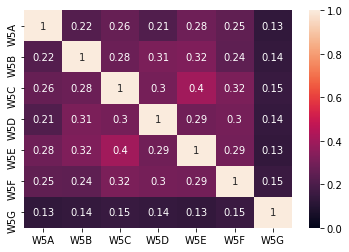

In [98]:
# Le rendre un peu plus joli avec Seaborn
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
import seaborn as sns
heatmap = sns.heatmap(corr, vmin=0, vmax=1, annot=True)

On constate la particularité du dernier indicateur ...

Lien entre les deux questions : on fait un tableau croisé

In [99]:
pd.crosstab(data["confiance_science"],data["confiance_scientifiques"],margins=True)

confiance_scientifiques,1-Not much or not at al,2-Some,3-A lot,4-DK/Refused,All
confiance_science,,,,,
1-Not much or not at al,7728,3805,2037,1559,15129
2-Some,7790,25369,11189,3231,47579
3-A lot,4368,12835,30015,2060,49278
4-DK/Refused,1521,1783,1123,2675,7102
All,21407,43792,44364,9525,119088


On peut le représenter sur un tableau croisé

<AxesSubplot:xlabel='confiance_science'>

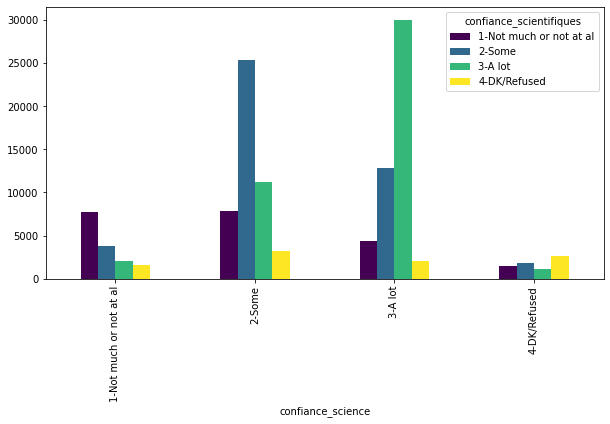

In [100]:
tab = pd.crosstab(data["confiance_science"],data["confiance_scientifiques"])
tab.plot(kind="bar",cmap="viridis",figsize=(10,5))

In [102]:
pyshs.tableau_croise(data,"confiance_science","confiance_scientifiques")

,1-Not much or not at al,2-Some,3-A lot,4-DK/Refused,Total
1-Not much or not at al,7728 (51.1%),3805 (25.2%),2037 (13.5%),1559 (10.3%),15129 (100%)
2-Some,7790 (16.4%),25369 (53.3%),11189 (23.5%),3231 (6.8%),47579 (100%)
3-A lot,4368 (8.9%),12835 (26.0%),30015 (60.9%),2060 (4.2%),49278 (100%)
4-DK/Refused,1521 (21.4%),1783 (25.1%),1123 (15.8%),2675 (37.7%),7102 (100%)
Total,21407 (18.0%),43792 (36.8%),44364 (37.3%),9525 (8.0%),119088 (100%)


<AxesSubplot:xlabel='confiance_science'>

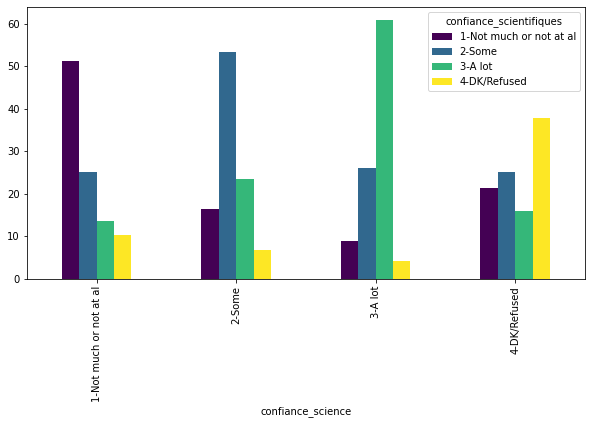

In [111]:
round(100*pd.crosstab(data["confiance_science"],
                      data["confiance_scientifiques"],normalize="index"),1).plot(kind="bar",figsize=(10,5),cmap="viridis")

Cela ne coincide pas exactement. On va donc créer une typologie pour notre analyse :
- confiance dans la science (W4 = 1,2), mais pas confiance dans les scientifiques (W5D=3,4)
- confiance dans les scientifiques, mais pas dans la science (l'inverse)
- pas confiance dans la science ni les scientifiques
- confiance dans les deux
- si une valeur manque, NA

In [ ]:
data["confiance_scientifiques"].unique()

In [112]:
def reco(ligne):
    #  Cas où une valeur manque
    if (ligne["confiance_science"]=='4-DK/Refused') | (ligne["confiance_scientifiques"]=='4-DK/Refused'):
        return "5-NA"
    
    # Cas où confiance science mais pas scientifique
    if (ligne["confiance_science"] in ['2-Some', '3-A lot']) & (ligne["confiance_scientifiques"] in ['1-Not much or not at al']):
        return "1-Confiance science mais pas les scientifiques"
    
    # Cas où confiance scientifique mais pas science
    if (ligne["confiance_science"] in ['1-Not much or not at al']) & (ligne["confiance_scientifiques"] in ['2-Some', '3-A lot']):
        return "2-Confiance scientifiques mais pas dans la science"
    
    # Cas où confiance générale
    if (ligne["confiance_science"] in ['2-Some', '3-A lot']) & (ligne["confiance_scientifiques"] in ['2-Some', '3-A lot']):
        return "3-Confiance science"
    
    # Cas où méfiance générale
    if (ligne["confiance_science"] in ['1-Not much or not at al']) & (ligne["confiance_scientifiques"] in ['1-Not much or not at al']):
        return "4-Méfiance science" 
    
# Appliquer le recodage
data["confiance_science_scientifiques"] = data.apply(reco,axis=1)
data["confiance_science_scientifiques"].value_counts()

3-Confiance science                                   79408
5-NA                                                  13952
1-Confiance science mais pas les scientifiques        12158
4-Méfiance science                                     7728
2-Confiance scientifiques mais pas dans la science     5842
Name: confiance_science_scientifiques, dtype: int64

## Etape 3. Production de données statistiques

Dans le cas ici, on a des données qui sont en plus structurées par pays. Il faut donc penser des traitements par pays (par exemple sur la France) et des comparaisons

On va utiliser une bibliothèque pour faire des statistiques

### Exploration du cas de la France

Construction d'un sous-corpus

In [113]:
data_fr = data[data["pays"].str.contains("France")]

In [115]:
data_fr.head()

,COUNTRYNEW,WPID_RANDOM,WGT,PROJWT,FIELD_DATE,YEAR_WAVE,W1,W2,W3,W4,...,revenus,gouvernants_valorisent_scientifiques,confiance_hopital,confiance_science,confiance_gouvernement,confiance_scientifiques,confiance_journalistes,confiance_medecins,confiance_rebouteux,confiance_science_scientifiques
10104,France,186458200.0,0.423835,23289.899282,1.382357e+10,2020.0,Some,Some of it,University,A lot,...,Second 20%,3-A lot,3-A lot,2-Some,2-Some,3-A lot,2-Some,3-A lot,3-A lot,3-Confiance science
10105,France,203621833.0,0.453261,24906.841470,1.382357e+10,2020.0,Some,Some of it,Secondary and post-secondary,A lot,...,Second 20%,2-Some,3-A lot,3-A lot,3-A lot,3-A lot,2-Some,2-Some,3-A lot,3-Confiance science
10106,France,138549237.0,0.297951,16372.518581,1.382357e+10,2020.0,Some,Some of it,University,Some,...,Richest 20%,1-Not much or not at al,2-Some,2-Some,1-Not much or not at al,2-Some,1-Not much or not at al,2-Some,1-Not much or not at al,3-Confiance science
10107,France,208005111.0,0.297951,16372.518581,1.382357e+10,2020.0,A lot,Some of it,Secondary and post-secondary,Some,...,Second 20%,1-Not much or not at al,2-Some,2-Some,2-Some,3-A lot,2-Some,3-A lot,3-A lot,3-Confiance science
10108,France,195476303.0,0.403065,22148.600751,1.382357e+10,2020.0,Not much,Not much of it,University,A lot,...,Middle 20%,3-A lot,3-A lot,3-A lot,2-Some,2-Some,2-Some,3-A lot,2-Some,3-Confiance science


#### Tri à plats

In [117]:
pyshs.tri_a_plat(data_fr,"confiance_science_scientifiques","poids")

,Effectif redressé,Pourcentage (%)
1-Confiance science mais pas les scientifiques,68.2,6.8
2-Confiance scientifiques mais pas dans la science,47.2,4.7
3-Confiance science,867.0,86.7
4-Méfiance science,5.5,0.6
5-NA,12.1,1.2
Total,1000.0,100.0


In [119]:
tableau = {
    "Confiance Science":pyshs.tri_a_plat(data_fr,"confiance_science","poids"),
    "Confiance Scientifiques":pyshs.tri_a_plat(data_fr,"confiance_scientifiques","poids"),
    "Confiance Hopital":pyshs.tri_a_plat(data_fr,"confiance_hopital","poids"),
    "Confiance Médecins":pyshs.tri_a_plat(data_fr,"confiance_medecins","poids"),
    "Confiance Gouvernement":pyshs.tri_a_plat(data_fr,"confiance_gouvernement","poids"),
}

tab_multiple = pd.concat(tableau,axis=1)
tab_multiple.to_excel("tableau.xls")
tab_multiple

/Users/emilien/anaconda3/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  # Remove the CWD from sys.path while we load stuff.


Confiance Science                  \
                        Effectif redressé Pourcentage (%)   
1-Not much or not at al              52.7             5.3   
2-Some                              382.2            38.2   
3-A lot                             558.9            55.9   
4-DK/Refused                          6.2             0.6   
Total                              1000.0           100.0   
None at all                           NaN             NaN   

                        Confiance Scientifiques                  \
                              Effectif redressé Pourcentage (%)   
1-Not much or not at al                    73.6             7.4   
2-Some                                    336.5            33.6   
3-A lot                                   584.0            58.4   
4-DK/Refused                                5.9             0.6   
Total                                    1000.0           100.0   
None at all                                 NaN             NaN   

                        Confiance Hopital                 Confiance Médecins  \
                        Effectif redressé Pourcentage (%)  Effectif redressé   
1-Not much or not at al              43.7             4.4               28.2   
2-Some                              250.2            25.0              141.5   
3-A lot                             685.1            68.5              827.9   
4-DK/Refused                          3.7             0.4                2.4   
Total                              1000.1           100.0             1000.0   
None at all                          17.4             1.7                NaN   

                                        Confiance Gouvernement                  
                        Pourcentage (%)      Effectif redressé Pourcentage (%)  
1-Not much or not at al             2.8                  429.9            43.0  
2-Some                             14.2                  346.6            34.7  
3-A lot                            82.8                  216.7            21.7  
4-DK/Refused                        0.2                    6.8             0.7  
Total                             100.0                 1000.0           100.1  
None at all                         NaN                    NaN             NaN

### Tableau croisé

In [121]:
var_ind = {"genre":"Genre","age_reco":"Age",
           "education":"Diplome"}

In [122]:
var_ind

{'genre': 'Genre', 'age_reco': 'Age', 'education': 'Diplome'}

In [123]:
pyshs.tableau_croise(data,"genre","confiance_hopital","poids")

,1-Not much or not at al,2-Some,3-A lot,4-DK/Refused,None at all,Total
Female,10030.5 (16.8%),23445.0 (39.2%),19276.1 (32.2%),2947.9 (4.9%),4160.4 (7.0%),59860.0 (100%)
Male,9623.1 (16.2%),22109.6 (37.3%),19452.0 (32.8%),3096.8 (5.2%),4946.7 (8.4%),59228.0 (100%)
Total,19653.6 (16.5%),45554.6 (38.3%),38728.1 (32.5%),6044.7 (5.1%),9107.1 (7.6%),119088.0 (100%)


Rapport Science/politique

In [124]:
pyshs.tableau_croise_multiple(data_fr,"confiance_hopital",var_ind,"poids")

1-Not much or not at al  \
Variable            Modalités                                                      
Genre (p = 0.008)   Female                                           24.8 (5.0%)   
                    Male                                             19.0 (3.8%)   
                    Total                                            43.7 (4.4%)   
Age (p = 0.611)     15-29                                             7.2 (3.8%)   
                    30-49                                            14.8 (4.7%)   
                    50+                                              21.5 (4.3%)   
                    DK/Refused                                      0.3 (100.0%)   
                    Total                                            43.7 (4.4%)   
Diplome (p = 0.113) Elementary or less (8 years or less)             10.0 (9.2%)   
                    Secondary (8-15 years)                           24.9 (3.4%)   
                    Tertiary (16+ years)                              8.8 (5.5%)   
                    Total                                            43.7 (4.4%)   

                                                                 2-Some  \
Variable            Modalités                                             
Genre (p = 0.008)   Female                                141.9 (28.6%)   
                    Male                                  108.2 (21.4%)   
                    Total                                 250.2 (25.0%)   
Age (p = 0.611)     15-29                                  54.3 (28.8%)   
                    30-49                                  80.5 (25.4%)   
                    50+                                   115.4 (23.3%)   
                    DK/Refused                               0.0 (0.0%)   
                    Total                                 250.2 (25.0%)   
Diplome (p = 0.113) Elementary or less (8 years or less)   25.0 (23.0%)   
                    Secondary (8-15 years)                188.5 (25.7%)   
                    Tertiary (16+ years)                   36.6 (23.0%)   
                    Total                                 250.2 (25.0%)   

                                                                3-A lot  \
Variable            Modalités                                             
Genre (p = 0.008)   Female                                316.8 (63.9%)   
                    Male                                  368.2 (73.0%)   
                    Total                                 685.1 (68.5%)   
Age (p = 0.611)     15-29                                 122.9 (65.2%)   
                    30-49                                 215.4 (67.9%)   
                    50+                                   346.8 (70.2%)   
                    DK/Refused                               0.0 (0.0%)   
                    Total                                 685.1 (68.5%)   
Diplome (p = 0.113) Elementary or less (8 years or less)   71.2 (65.4%)   
                    Secondary (8-15 years)                506.0 (69.1%)   
                    Tertiary (16+ years)                  107.9 (67.9%)   
                    Total                                 685.1 (68.5%)   

                                                         4-DK/Refused  \
Variable            Modalités                                           
Genre (p = 0.008)   Female                                 0.3 (0.1%)   
                    Male                                   3.4 (0.7%)   
                    Total                                  3.7 (0.4%)   
Age (p = 0.611)     15-29                                  0.0 (0.0%)   
                    30-49                                  1.6 (0.5%)   
                    50+                                    2.1 (0.4%)   
                    DK/Refused                             0.0 (0.0%)   
                    Total                                  3.7 (0.4%)   
Diplome (p = 0.113) Elementary or less (8 years 

Pas de grosses variations

#### Petit visualisation

Text(0.5, 0.98, 'Confiance des répondants du pays')

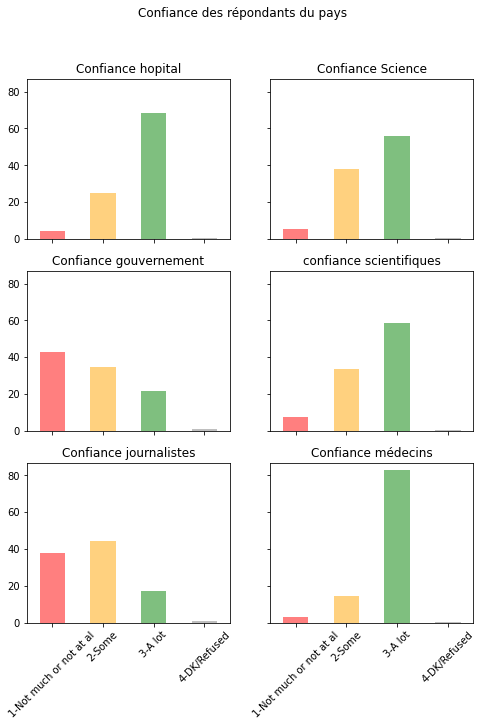

In [131]:
# Définir en amont les variables
variables = {"confiance_hopital":"Confiance hopital","confiance_science":"Confiance Science",
            "confiance_gouvernement":"Confiance gouvernement","confiance_scientifiques":"confiance scientifiques",
            "confiance_journalistes":"Confiance journalistes","confiance_medecins":"Confiance médecins"}

# Définir une nouvelle figure
fig,ax = plt.subplots(3,2,figsize=(8,10),sharex=True,sharey=True)

# passer le tableau de 2 dimensions à 1
ax = ax.flatten()

# Pour chaque variable à tracer
for i,j in zip(variables,range(0,len(variables))):
    t = pyshs.tri_a_plat(data_fr,i,"poids")["Pourcentage (%)"].drop("Total")
    t.plot(kind='bar',ax=ax[j],color = ["red","orange","green","gray"],alpha=0.5,rot=45)
    ax[j].set_title(variables[i])
    
fig.suptitle("Confiance des répondants du pays")

#### Par pays, afficher la confiance à l'hopital

In [132]:
data["pays"]

0         United States
1         United States
2         United States
3         United States
4         United States
              ...      
119083           Kosovo
119084           Kosovo
119085           Kosovo
119086           Kosovo
119087           Kosovo
Name: pays, Length: 119088, dtype: object

<AxesSubplot:ylabel='pays'>

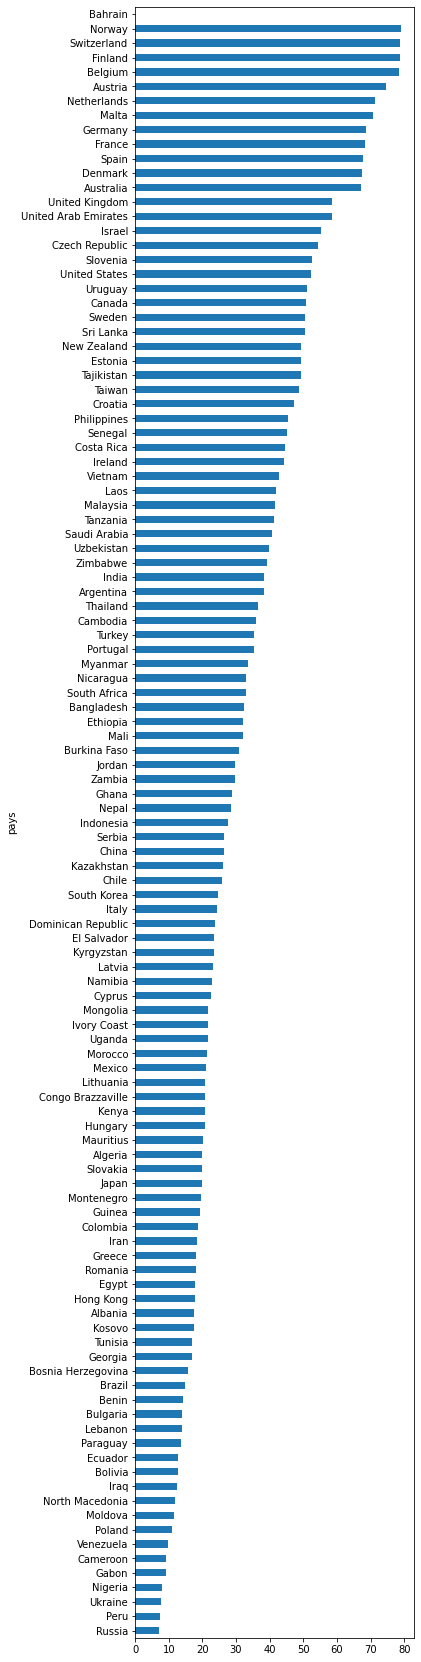

In [133]:
# Construire une fonction dédiée qui traite un tableau pandas
def prop_lot(x):
    t = pyshs.tri_a_plat(x,"confiance_hopital","poids")
    try:
        return t.loc['3-A lot',"Pourcentage (%)"]
    except:
        return None

# L'appliquer à la sortie d'un groupby, trier et afficher
data.groupby("pays").apply(prop_lot).sort_values().plot(kind="barh",figsize=(5,30))

## Analyse statistique plus avancée

Suivant votre spécialité, vous aimeriez faire des traitements. En tant que sociologue, je serai intéressé à connaître les principaux déterminants sur certaines variables d'intérêts, par exemple le fait de penser que les gouvernants valorise l'expertise des scientifiques. Une solution est de faire une régression logistique. Plusieurs solutions pour cela : passer par la bibliothèque statsmodels, ou utiliser le wrapper de pyshs pour obtenir un tableau rapidement

Créer une variable dichotomisée dépendante 1/0

In [134]:
data["valo_sci_dich"] = data["gouvernants_valorisent_scientifiques"].apply(lambda x : 1 if x=="3-A lot" else 0)

In [136]:
data["valo_sci_dich"].value_counts()

0    96459
1    22629
Name: valo_sci_dich, dtype: int64

In [137]:
var_ind = {"genre":"Genre","age_reco":"Age","revenus":"Revenus"}
pyshs.regression_logistique(data,"valo_sci_dich",var_ind,"poids")

Odds Ratio        p            IC 95%
Variable   Modalité                                         
.Intercept                   0.23   0.0***  0.23 [0.22-0.24]
Age        15-29              ref                           
           30-49             0.98    0.236  0.98 [0.95-1.01]
           50+               1.05  0.008**  1.05 [1.01-1.09]
           DK/Refused         1.2    0.076  1.20 [0.98-1.46]
Genre      Female             ref                           
           Male              1.06   0.0***  1.06 [1.03-1.10]
Revenus    Fourth 20%         ref                           
           Middle 20%        1.02    0.375  1.02 [0.98-1.07]
           NA                0.83   0.032*  0.83 [0.70-0.98]
           Poorest 20%       1.07  0.005**  1.07 [1.02-1.12]
           Richest 20%       0.95   0.018*  0.95 [0.90-0.99]
           Second 20%        1.02    0.338  1.02 [0.98-1.07]

## Représentations géographiques

Pour cela on utilise GéoPandas

Il faut un fond de carte, généralement en shapefiles : https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/

In [138]:
import geopandas as gpd

In [139]:
carte = gpd.read_file("./world-administrative-boundaries/world-administrative-boundaries.shp")

In [141]:
carte

,status,color_code,region,iso3,continent,name,iso_3166_1_,french_shor,geometry
0,Member State,SMR,Southern Europe,SMR,Europe,San Marino,SM,Saint-Marin,"POLYGON ((12.40913 43.90842, 12.40352 43.92092..."
1,Member State,SYR,Western Asia,SYR,Asia,Syrian Arab Republic,SY,RÃ©publique arabe syrienne,"POLYGON ((42.35562 37.10693, 42.37833 37.07206..."
2,Member State,LVA,Northern Europe,LVA,Europe,Latvia,LV,Lettonie,"POLYGON ((27.37206 57.53564, 27.42500 57.53194..."
3,Member State,CPV,Western Africa,CPV,Africa,Cape Verde,CV,Cabo Verde,"MULTIPOLYGON (((-24.36556 14.81292, -24.39000 ..."
4,Member State,ZMB,Eastern Africa,ZMB,Africa,Zambia,ZM,Zambie,"POLYGON ((32.94040 -9.40508, 32.93944 -9.41583..."
...,...,...,...,...,...,...,...,...,...
251,FR Territory,FRA,Caribbean,MTQ,Americas,Martinique,MQ,Martinique,"POLYGON ((-60.81695 14.47333, -60.82056 14.455..."
252,Member State,MYS,South-Eastern Asia,MYS,Asia,Malaysia,MY,Malaisie,"MULTIPOLYGON (((111.41152 2.37639, 111.36804 2..."
253,Member State,KEN,Eastern Africa,KEN,Africa,Kenya,KE,Kenya,"MULTIPOLYGON (((41.13805 -2.12444, 41.09416 -2..."
254,PT Territory,PRT,Southern Europe,None,Europe,Madeira Islands,None,Madeira Islands,"POLYGON ((-17.10250 32.82333, -17.05306 32.809..."


Vérifions que le nom des pays est écrit de la même manière dans le jeu de données et dans la carte

In [142]:
noms_cartes = carte["name"].unique()
noms_data = data["COUNTRYNEW"].unique()

for i in noms_data:
    if not i in noms_cartes:
        print(i)

United States
United Kingdom
Iran
Tanzania
Laos
South Korea
Moldova
Russia
Bosnia Herzegovina
Congo Brazzaville
Ivory Coast
North Macedonia
Kosovo


Ce sont les noms qu'il faut relier, donc on va créer un dictionnaire de correspondances et créer une nouvelle colonne avec les noms recodées

In [143]:
reco = {   "United States":'United States of America',
    "United Kingdom":'U.K. of Great Britain and Northern Ireland',
    "Iran":'Iran (Islamic Republic of)',
    "Tanzania":'United Republic of Tanzania',
     "South Korea":'Republic of Korea',
     'Moldova':'Moldova, Republic of',
     "Russia":'Russian Federation',
     "Bosnia Herzegovina":'Bosnia & Herzegovina',
     "Congo Brazzaville":'Democratic Republic of the Congo',
     "North Macedonia":'The former Yugoslav Republic of Macedonia'
    }

# reste à faire Kosovo et Ivory Coast
data["pays_reco"] = data["pays"].replace(reco) 

Il est possible maintenant de créer des données par pays à partir du sondage

In [144]:
data_pays = pd.DataFrame(data.groupby("pays_reco").apply(prop_lot),columns=["Confiance hopital"])

Et de les associer à la carte

In [145]:
carte_data = carte.join(data_pays,on="name")

Pour construire une visualisation (plus de détail par exemple sur  https://geopandas.org/en/stable/docs/user_guide/mapping.html)

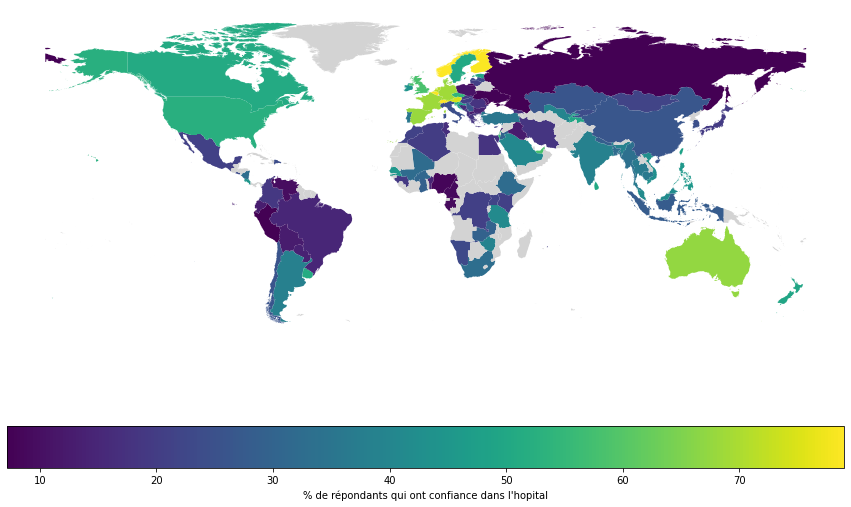

In [146]:
ax = carte_data.plot(column='Confiance hopital',figsize=(15,10),legend=True,
                legend_kwds={'label': "% de répondants qui ont confiance dans l'hopital",
                             'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey'})
ax.set_axis_off()

Aller plus loin avec des cartes interactives : https://python-visualization.github.io/folium/quickstart.html